Import potrebnych knihoven

In [1]:
import geopandas as gpd
import geodatasets
import folium
import matplotlib.pyplot as plt
import pandas as pd

Nascitani dopravnich nehod po jednotlivych mestskych castech

In [2]:
accidents_parkedcars = pd.read_csv('parkedcars.csv', low_memory=False)
district_accidents = accidents_parkedcars.groupby('mestska_cast', as_index=False)['id'].nunique()
district_accidents = district_accidents.rename(columns = {'mestska_cast': 'NAZEV_MC'})
district_accidents

,NAZEV_MC,id
0,Praha 1,2918
1,Praha 10,3000
2,Praha 11,1843
3,Praha 12,1160
4,Praha 13,1235
5,Praha 14,1045
6,Praha 15,686
7,Praha 16,145
8,Praha 17,451
9,Praha 18,458


Nacteni dat s polygony mestskych casti

In [3]:
city_districts = gpd.read_file('TMMESTSKECASTI.json')
city_districts.head()

,OBJECTID,DAT_VZNIK,KOD_MC,NAZEV_MC,KOD_MO,KOD_SO,STAV_ZMENA,POSKYT,NAZEV_1,Shape_Length,Shape_Area,geometry
0,1,20180507091331,547310,Praha-Čakovice,94,221,U,HMP-IPR,Čakovice,0.213162,0.001281,"POLYGON ((14.53373 50.16223, 14.53424 50.16156..."
1,2,20171110095818,547361,Praha 14,94,141,U,HMP-IPR,Praha 14,0.248634,0.001700,"POLYGON ((14.55493 50.08171, 14.55492 50.08173..."
2,3,20180507091331,547107,Praha 12,43,124,U,HMP-IPR,Praha 12,0.326892,0.002924,"POLYGON ((14.45301 50.00255, 14.45307 50.00246..."
3,4,20170904102432,547174,Praha 17,60,213,U,HMP-IPR,Praha 17,0.095029,0.000409,"POLYGON ((14.29321 50.07751, 14.29319 50.07755..."
4,5,20171204150607,539791,Praha-Újezd,43,116,U,HMP-IPR,Újezd,0.113934,0.000465,"POLYGON ((14.53549 50.01175, 14.53543 50.01178..."


In [4]:
city_districts_accidents = city_districts.merge(district_accidents, how='left', on='NAZEV_MC')
city_districts_accidents['NAZEV_MC'] = city_districts_accidents['NAZEV_MC'].str.replace(' ', '\xa0')

Znazorneni mestskych casti bez zavislosti na mape

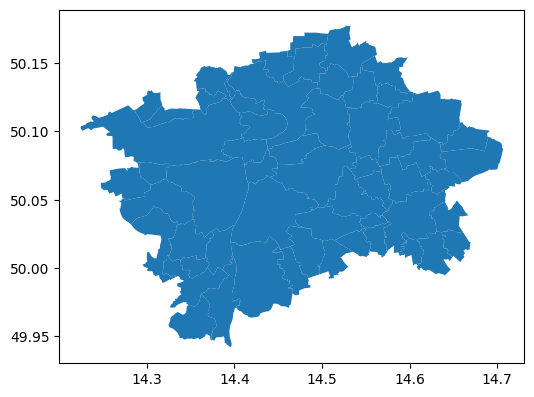

In [5]:
city_districts_accidents.plot(figsize=(6, 6))
plt.show()

Nacteni podkladove mapy Prahy

In [6]:
m = folium.Map(location=[50.055, 14.45], zoom_start=10, tiles="CartoDB positron")
m

Prekryti mapy mestskymi castmi

In [7]:
for _, r in city_districts_accidents.iterrows():
    geo_j = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001).to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "#0291e3"})
    popup_text = f"{r['NAZEV_MC']}\n Počet:\xa0{r['id']}"
    folium.Popup(popup_text).add_to(geo_j)
    geo_j.add_to(m)
m



Export mapy do souboru

In [8]:
geo_j.save('parkedcarsmap.html')